**Intermediate Assignment**</br>
FSDA JAN2023 - W6W7W8 Assignment Python </br>
Section Hamburg Team 1 </br>
Margianto Ramadhani

# 1.Business Background
You are a data analyst in an Indonesian investment startup which makes an application that can buy and sell mutual funds (Indonesian: reksadana). The mutual funds consist of: stocks mutual funds (saham), bond mutual funds (pendapatan tetap), money market mutual funds (pasar uang), and mixed-investment mutual funds (campuran). As the name suggests, the types reflect the underlying investment made
by the Fund Manager for the mutual fund.

Mr Djoko as head of data, give you this problem to solve
"What kinds of thematic campaigns that we can recommend to the marketing team for the next month?"

In the next month, the marketing team wants to create a thematic campaign based on user preference. You, as data analyst will be tasked to create a segmentation for this thematic campaign and give recommendations (as objective) on the themes on each campaign.

## A. Source of Dataset

- users dataset (spreadsheet)
https://docs.google.com/spreadsheets/d/1My4ZAqFkF2UDbegp5f5bmuoG0rN07P9agzbTNxB7XMU/edit?usp=share_link

- daily_user_transaction dataset (spreadsheet)
https://docs.google.com/spreadsheets/d/1EnPDMl2KZPpaSx898SWBRT1yHJfnR192jaSJNbKQ0Qs/edit?usp=share_link

## B. Data Dictionary

- Data dictionary for users

|column							|definition																								| 
|-------------------------------|-------------------------------------------------------------------------------------------------------|
|user_id						|Client ID on the platform																				|
|registration_import_datetime	|Registration time and date at UTC+7 timezone (WIB)														|
|user_gender					|User self-identified gender																			|
|user_age						|User self-identified age																				|
|user_occupation				|User self-identified job																				|
|user_income_range				|User self-identified income range																		|
|referral_code_used				|If user enter referral code during registration, the value is "used referral"; else will be Null valued|
|user_income_source				|User self-declared source of income																	|
|end_of_month_invested_amount	|End of month total amount of mutual fund that are still invested in the platform						|
|total_buy_amount				|Total buying amount of mutual funds																	|
|total_sell_amount				|Total selling amount of mutual funds																	|

</br>

- Datadictionary for daily_user_transaction

|column									 |definition																												|
|----------------------------------------|--------------------------------------------------------------------------------------------------------------------------|
|user_id								 |Client ID on the platform																									|
|date									 |Date of the transaction																									|
|buy_saham_transaction_amount			 |Amount of Saham mutual fund that are bought by user at that date															|
|sell_saham_transaction_amount			 |Amount of Saham mutual fund that are sell by user at that date															|
|buy_pasar_uang_transaction_amount		 |Amount of Pasar Uang mutual fund that are bought by user at that date														|
|sell_pasar_uang_transaction_amount		 |Amount of Pasar Uang mutual fund that are sell by user at that date														|
|buy_pendapatan_tetap_transaction_amount |Amount of Pendapatan Tetap mutual fund that are bought by user at that date												|
|sell_pendapatan_tetap_transaction_amount|Amount of Pendapatan Tetap mutual fund that are sell by user at that date													|
|buy_campuran_transaction_amount		 |Amount of Campuran mutual fund that are bought by user at that date														|
|sell_campuran_transaction_amount		 |Amount of Campuran mutual fund that are sell by user at that date															|
|total_buy_transaction_amount			 |Total mutual fund that are bought by user at that date																	|
|total_sell_transaction_amount			 |Total mutual fund that are sell by user at that date																		|
|saham_invested_amount					 |Amount of Saham mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)			|
|pasar_uang_invested_amount				 |Amount of Pasar Uang mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)		|
|pendapatan_tetap_invested_amount		 |Amount of Pendapatan Tetap mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)	|
|campuran_invested_amount				 |Amount of Campuran mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)			|
|total_invested_amount					 |Total amount of mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)			|

#2.Analytical Objective

Create a segmentation for this thematic campaign based on user preference and give recommendations on the themes on each campaign to the marketing team for the next month.


# 3.Data Preparation







## A. Import library

In [879]:
# import all libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas import DataFrame

## B. Import datasets

### a. Read Dataset users

In [880]:
# Open Google Sheet file of users dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1My4ZAqFkF2UDbegp5f5bmuoG0rN07P9agzbTNxB7XMU/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
users = pd.read_csv(sheet_url_trf)

https://docs.google.com/spreadsheets/d/1My4ZAqFkF2UDbegp5f5bmuoG0rN07P9agzbTNxB7XMU/export?format=csv&gid=0


In [881]:
#check sample of users dataset
users.head(2)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0


### b. Read Dataset daily_user_transaction

In [882]:
# Open Google Sheet file of daily_user_transaction
sheet_url = 'https://docs.google.com/spreadsheets/d/1EnPDMl2KZPpaSx898SWBRT1yHJfnR192jaSJNbKQ0Qs/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
daily_user_transaction = pd.read_csv(sheet_url_trf)

https://docs.google.com/spreadsheets/d/1EnPDMl2KZPpaSx898SWBRT1yHJfnR192jaSJNbKQ0Qs/export?format=csv&gid=0


In [883]:
#check sample of daily_user_transaction dataset
daily_user_transaction.head(2)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


## C. Check Information of Data

In [884]:
# check information of users dataset with original data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


Insight
1. The dataset consist of 14712 rows and 11 columns
2. Column headings are known
3. The dataset consist data types int64(5) and object(6)
4. The referral_code_used field contains some null values

In [885]:
# check information of daily_user_transaction dataset with original data
daily_user_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

Insight
1. The dataset consist of 158811 rows and 17 columns
2. Column headings are known
3. The dataset consist data types float64(12), int64(4) and object(1)
4. The several columns contains some null values

# 4.Data Cleaning
Data Cleaning Steps and Considerations (Elaborate The reason of Data Cleaning)</br>

*   Removing Irrelevant values
*   Handling Missing Data
*   Removing Duplicates
*   String Manipulation
*   Time Series Manipulation

## A. Data Cleaning Users

### a. Removing Irrelevant Values

In [886]:
#copy original data for handle irrelevant values
df_iv = users.copy()
#check total values ​​with unique values
df_iv.nunique() 

user_id                         14712
registration_import_datetime    11536
user_gender                         2
user_age                           58
user_occupation                     9
user_income_range                   6
referral_code_used                  1
user_income_source                 10
end_of_month_invested_amount     1042
total_buy_amount                  824
total_sell_amount                 548
dtype: int64

Insight
1. Columns user_id contains unique values 14712 from 14712 rows as primary key
2. The several columns have multiple defined options
3. Need to check on detalied value at several columns that may contains irrelevant values or typo

In [887]:
# Check multiple columns that have multiple defined options 
# to see if there are irrelevant values ​​and typos
print(df_iv['user_gender'].value_counts())
print(50*"-")
print(df_iv['user_occupation'].value_counts())
print(50*"-")
print(df_iv['user_income_range'].value_counts())
print(50*"-")
print(df_iv['user_income_source'].value_counts())
print(50*"-")

Male      8977
Female    5735
Name: user_gender, dtype: int64
--------------------------------------------------
Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64
--------------------------------------------------
< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64
--------------------------------------------------
Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64
---

Insight
1. Based on unique values on several columns no irrelevant values and typos found

### b. Handling Missing Data

In [888]:
#copy dataset from Removing Irrelevant Values to be handle Missing Data
df_md = df_iv.copy() 
#check total null data in each columns
df_md.isnull().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

Insight
1. From all columns, there is 1 column of referral_code_used has 9108 missing values from 14712 rows

In [889]:
# Check total and values on columns referral_code_used
df_md['referral_code_used'].value_counts()

used referral    5604
Name: referral_code_used, dtype: int64

In [890]:
# fill na with no referral
df_md['referral_code_used'].fillna('no referral', inplace=True)

In [891]:
# Check total and values on columns referral_code_used
# After cleaning data by fillna
df_md['referral_code_used'].value_counts()

no referral      9108
used referral    5604
Name: referral_code_used, dtype: int64

Insight
1. referral_code_used contains 5604 "used referral" values
2. missing values has been filled by no referral that contains 9108 values

In [892]:
# check null values after fill missing values
df_md.isnull().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
end_of_month_invested_amount    0
total_buy_amount                0
total_sell_amount               0
dtype: int64

In [893]:
# Check data values with 0 to comfirmation of inactive data only without deleted the data
df_md[(df_md.total_buy_amount == 0) & (df_md.total_sell_amount == 0) & (df_md.end_of_month_invested_amount == 0)]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,0,0,0
6,1407611,2021-09-23 20:55:59,Male,56,Swasta,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,0,0,0
10,3820348,2021-08-12 20:40:15,Male,47,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Gaji,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no referral,Gaji,0,0,0
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Lainnya,0,0,0
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,no referral,Dari Suami / istri,0,0,0
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no referral,Gaji,0,0,0


Insight
1. There are 6954 inactive users from 14712 registered user

### c. Removing Duplicates

In [894]:
df_d = df_md.copy() #copy dataset from handling missing data to be handle duplicates
df_d.head(2)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0


In [895]:
#check duplicate on user_id
df_d[df_d['user_id'].duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount


In [896]:
# check duplicate on all columns and rows
df_d[df_d.duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount


Insight
1. No duplicate values at column user_id as a PK
2. No duplicate values at all data

### d. String Manipulation

In [897]:
#copy dataset from handling duplicates to be handle string manipulation
df_s = df_d.copy() 
#check datatypes of all columns
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            14712 non-null  object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [898]:
#Change user_id data type into string because it does not include mathematical calculations
df_s['user_id'] = df_s['user_id'].astype(str)
print(df_s['user_id'].dtypes)

object


Insight
1. Data type of user_id is int, but it cannot be included the mathematical calculation. So, better to convert the data type to be string
2. user_id columns has been converted from integer to string due to it does not include mathematical calculations

### e. Time Series Manipulation

In [899]:
#copy dataset from handling string manipulation to be handle time series manipulation
df_ts = df_s.copy()
# Check sample data that contains time values
df_ts.head(2)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0


In [900]:
# check datatype of column registration_import_datetime
df_ts['registration_import_datetime'].dtypes

dtype('O')

In [901]:
#Convert dtypes object to datetime
df_ts['registration_import_datetime'] = pd.to_datetime(df_ts['registration_import_datetime'])

In [902]:
# check datatype of column registration_import_datetime after converted
df_ts['registration_import_datetime'].dtypes

dtype('<M8[ns]')

Insight
1. Only column registration_import_datetime that has data type date time
2. The column registration_import_datetime has been converted to datetime from string

In [903]:
#check info data types and all data after cleaning
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

Insight
1. registration_import_datetime columns has been converted from string to date time due to this column contains times data

In [904]:
# Check sample data after cleaning
df_ts.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


## B. Data Cleaning daily_user_transaction

### a. Removing Irrelevant Values

In [905]:
#copy original data to be handle irrelevant values
df_dut_iv = daily_user_transaction.copy() 
#Check sample data
df_dut_iv.head(2)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


In [906]:
# check total unique values from all columns
df_dut_iv.nunique()

user_id                                     8277
date                                          42
buy_saham_transaction_amount                 422
sell_saham_transaction_amount                386
buy_pasar_uang_transaction_amount            408
sell_pasar_uang_transaction_amount           311
buy_pendapatan_tetap_transaction_amount      502
sell_pendapatan_tetap_transaction_amount     345
buy_campuran_transaction_amount               33
sell_campuran_transaction_amount              24
total_buy_transaction_amount                 816
total_sell_transaction_amount                765
saham_invested_amount                       1084
pasar_uang_invested_amount                  1157
pendapatan_tetap_invested_amount            1386
campuran_invested_amount                      88
total_invested_amount                       2727
dtype: int64

Insight

1. Columns user_id contains unique values 8277 from 158811 rows, so that there are several users making repeated transactions
2. all columns consist of unique values ​​according to different contents without any fixed options, so they do not contain irrelevant values

### b. Handling Missing Data

In [907]:
#copy df from removing irrelevant values data to be handle misisng values
df_dut_md = df_dut_iv.copy() 
#check total null values from all columns
df_dut_md.isnull().sum()

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    0
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

In [908]:
#check total rows and columns from dataset
df_dut_md.shape

(158811, 17)

Insight
1. Total rows of the dataset is 158811
2. There are many of columns have missing values, but it still make sense because there are many users that do not make the transaction

In [909]:
# Filter all rows with all total transaction 0
df_dut_md[(df_dut_md.total_buy_transaction_amount == 0) & 
          (df_dut_md.total_sell_transaction_amount == 0) & 
          (df_dut_md.total_invested_amount == 0)]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
103,61414,2021-08-16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,0
104,61414,2021-08-17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,0
105,61414,2021-08-18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,0
106,61414,2021-08-19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,0
107,61414,2021-08-20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158784,4161634,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,0
158792,4162795,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,0
158797,4163348,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,0
158802,4164476,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,0


In [910]:
# check total null values
df_dut_md.isnull().sum()

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    0
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

Insight
1. The data with total transaction of buy, sell and invested equal to 0 is 30760 rows that shown there are no transaction made
2. Missing data only exist on transaction columns, it still make sense due to no transaction made
3. Leave the missing data as is condition for next deep analysis

### c. Removing Duplicates

In [911]:
#copy missing data to be handle duplicates
df_dut_d = df_dut_md.copy() 
#Check duplicate at user_id
df_dut_d[df_dut_d['user_id'].duplicated()]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
5,50701,2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158732,4157033,2021-09-30,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,0
158734,4157054,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,0,-10000,NaN,0.0,NaN,NaN,0
158737,4157117,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,0,-10000,NaN,0.0,NaN,NaN,0
158739,4157132,2021-09-30,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,10000.0,NaN,NaN,10000


In [912]:
df_dut_d[df_dut_d.duplicated()]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount


Insight
1. All columns of user_id are normal to have duplicate data because they are daily transactions which are done by user id periodically
2. Overall data do not have duplicate data

### d. String Manipulation

In [913]:
#copy removing duplicates data to be handle string manipulation
df_dut_sm = df_dut_d.copy()
df_dut_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [914]:
#Change user_id data type into string because it does not include mathematical calculations
df_dut_sm['user_id'] = df_dut_sm['user_id'].astype(str)
print(df_s['user_id'].dtypes)

object


Insight
1. From all columns only user_id that should be string data type based on its value that no need to do the mathematical analytics
2. user_id columns has been converted from integer to string due to it does not include mathematical calculations

### e. Time Series manipulation

In [915]:
#copy removing duplicates data to be handle string manipulation
df_dut_tsm = df_dut_sm.copy() 
#CHeck sample values of dataset
df_dut_tsm.head(2)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


Insight
1. Only columns date that contains date values

In [916]:
# check datatype of column registration_import_datetime
df_dut_tsm['date'].dtypes

dtype('O')

In [917]:
#Convert dtypes object to datetime
df_dut_tsm['date'] = pd.to_datetime(df_dut_tsm['date'])
df_dut_tsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

Insight
1.  date columns has been converted from string to date time due to this column contains times data

In [918]:
# Check dataset after celaning
df_dut_tsm.head(2)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


## C.Join The Dataset

### a. Import and Join Dataset

In [919]:
# check dataset users after cleaning
df_ts.head(2)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no referral,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no referral,Gaji,0,0,0


In [920]:
# check dataset daily_user_transaction after cleaning
df_dut_tsm.head(2)

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


In [921]:
# Join the table
# Since we want to analyze the transaction based on user_id, better we use inner join to display only user_id that are actively making transactions
df_join = df_ts.merge(df_dut_tsm, how='inner', left_on =['user_id'], right_on = ['user_id'])
df_join

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,2021-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,2021-08-18,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,2021-08-19,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,2021-08-20,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no referral,Gaji,600000,100000,0,2021-08-23,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,2021-09-24,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,10000000.0,10100000.0,41000000.0,NaN,61100000
158807,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,2021-09-27,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,10000000.0,10100000.0,41000000.0,NaN,61100000
158808,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,2021-09-28,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,10000000.0,10100000.0,41000000.0,NaN,61100000
158809,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no referral,Keuntungan Bisnis,71100000,60000000,0,2021-09-29,10000000.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,10000000,0,20000000.0,10100000.0,41000000.0,NaN,71100000


In [922]:
#Check dataset info
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [923]:
#Check unique values
df_join.nunique()

user_id                                     8277
registration_import_datetime                6581
user_gender                                    2
user_age                                      56
user_occupation                                9
user_income_range                              6
referral_code_used                             2
user_income_source                            10
end_of_month_invested_amount                1042
total_buy_amount                             824
total_sell_amount                            548
date                                          42
buy_saham_transaction_amount                 422
sell_saham_transaction_amount                386
buy_pasar_uang_transaction_amount            408
sell_pasar_uang_transaction_amount           311
buy_pendapatan_tetap_transaction_amount      502
sell_pendapatan_tetap_transaction_amount     345
buy_campuran_transaction_amount               33
sell_campuran_transaction_amount              24
total_buy_transactio

In [924]:
# check duplicate data after join the table
df_join[df_join.duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount


Insight
1. There is same column on table user and daily_user_transaction as PK that can be used for join the table
2. Inner join is selected for this case so that the results obtained are intersecting data in accordance with the required analysis
3. Total rows after join is 158811, that show the total of transaction
4. There are many missing values on column transaction that still make sense due to there is no transaction in one of transaction type
5. Total unique values from user_id is 8277 which means only 8277 active users make transactions from 14712 registered users
6. After cross check of duplicates value, there is no duplicates on all rows and columns

### b. handling Outliers

In [925]:
#copy dataset from filtering data
df_o = df_join.copy()
df_o.describe()

,user_age,end_of_month_invested_amount,total_buy_amount,total_sell_amount,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,158811.000000,1.588110e+05,1.588110e+05,1.588110e+05,9.903100e+04,1.808000e+03,1.222630e+05,2.010000e+03,9.891600e+04,1.581000e+03,5.072000e+03,4.600000e+01,1.588110e+05,1.588110e+05,1.062920e+05,1.310810e+05,1.059460e+05,5.352000e+03,1.588110e+05
mean,27.201774,3.007510e+06,2.001689e+06,-4.506169e+05,1.605908e+04,-2.550454e+05,3.047233e+04,-5.056617e+05,6.622950e+04,-4.872123e+05,1.047766e+05,-3.862567e+06,7.807123e+04,-1.527264e+04,4.423400e+05,8.409062e+05,1.782458e+06,7.810109e+06,2.442450e+06
std,8.579667,2.808345e+07,2.117149e+07,4.822935e+06,3.265543e+05,7.324554e+05,1.332823e+06,5.049578e+06,2.938108e+06,3.584982e+06,1.347012e+06,8.621733e+06,2.723035e+06,7.088378e+05,2.135788e+06,1.410083e+07,2.340237e+07,2.508261e+07,2.490078e+07
min,17.000000,0.000000e+00,0.000000e+00,-1.850000e+08,0.000000e+00,-1.176680e+07,0.000000e+00,-1.850000e+08,0.000000e+00,-9.271240e+07,0.000000e+00,-5.000000e+07,0.000000e+00,-1.850000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,21.000000,0.000000e+00,0.000000e+00,-1.000000e+05,0.000000e+00,-1.804692e+05,0.000000e+00,-1.000000e+05,0.000000e+00,-1.500000e+05,0.000000e+00,-3.375000e+06,0.000000e+00,0.000000e+00,1.000000e+04,1.000000e+04,2.500000e+04,7.500000e+05,1.000000e+04
50%,25.000000,1.000000e+05,1.000000e+04,0.000000e+00,0.000000e+00,-6.000000e+04,0.000000e+00,-2.000000e+04,0.000000e+00,-5.050000e+04,0.000000e+00,-1.000000e+06,0.000000e+00,0.000000e+00,5.000000e+04,2.000000e+04,6.500000e+04,1.500000e+06,1.000000e+05
75%,31.000000,6.000000e+05,3.000000e+05,0.000000e+00,0.000000e+00,-4.000000e+04,0.000000e+00,-1.000000e+04,0.000000e+00,-4.000000e+04,0.000000e+00,-5.875000e+05,0.000000e+00,0.000000e+00,2.000000e+05,1.100000e+05,2.400000e+05,5.000000e+06,5.000000e+05
max,83.000000,1.012200e+09,7.995000e+08,0.000000e+00,5.000000e+07,-1.108000e+03,2.892000e+08,-4.000000e+03,4.000000e+08,-1.000000e+00,5.000000e+07,-5.000000e+04,4.500000e+08,0.000000e+00,6.184000e+07,1.012200e+09,9.700000e+08,3.000000e+08,1.012200e+09


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass t

<AxesSubplot:xlabel='total_invested_amount'>

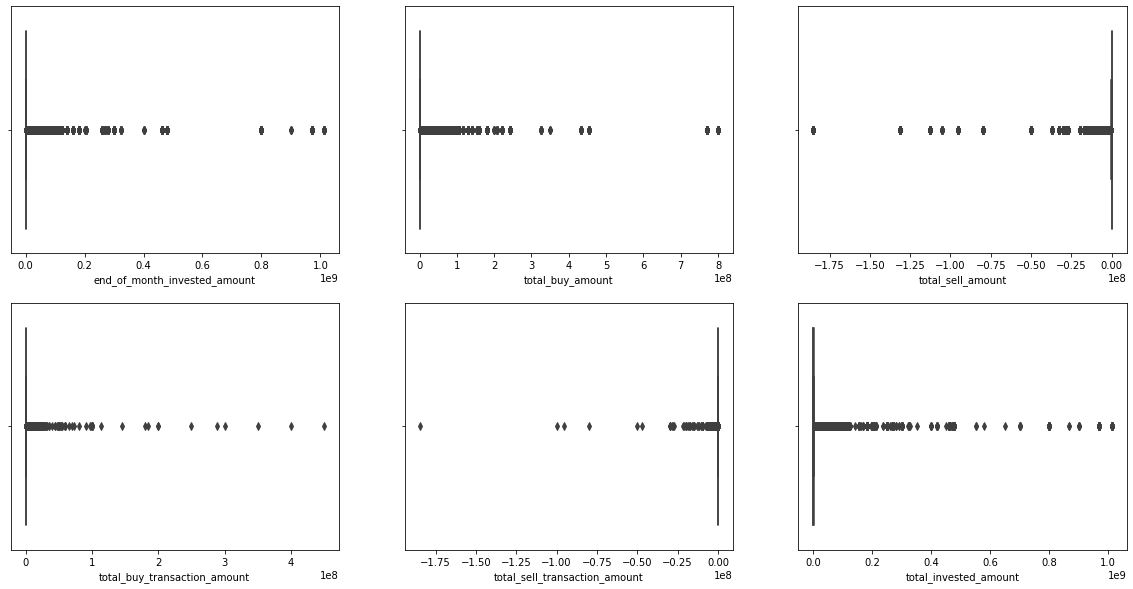

In [926]:
#Cheking the data distribution of the join data for several columns
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(df_o['end_of_month_invested_amount'])

plt.subplot(2,3,2)
sns.boxplot(df_o['total_buy_amount'])

plt.subplot(2,3,3)
sns.boxplot(df_o['total_sell_amount'])

plt.subplot(2,3,4)
sns.boxplot(df_o['total_buy_transaction_amount'])

plt.subplot(2,3,5)
sns.boxplot(df_o['total_sell_transaction_amount'])

plt.subplot(2,3,6)
sns.boxplot(df_o['total_invested_amount'])

In [927]:
#Check the Q1,Q3,IQR,UB & LB
#ainc = total_invested_amount
print('Outlier Detection "total_invested_amount":\n')
ainc_Q1 = df_o["total_invested_amount"].quantile(0.25)
print("Q1 =",ainc_Q1)

ainc_Q3 = df_o["total_invested_amount"].quantile(0.75)
print("Q3 =",ainc_Q3)

ainc_IQR = ainc_Q3 - ainc_Q1
print("IQR =",ainc_IQR)

ainc_LB = ainc_Q1-1.5*ainc_IQR
print("LB =",ainc_LB)

ainc_UB = ainc_Q3+1.5*ainc_IQR
print("UB =",ainc_UB)

Outlier Detection "total_invested_amount":

Q1 = 10000.0
Q3 = 500000.0
IQR = 490000.0
LB = -725000.0
UB = 1235000.0


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/di

<AxesSubplot:xlabel='total_invested_amount', ylabel='Density'>

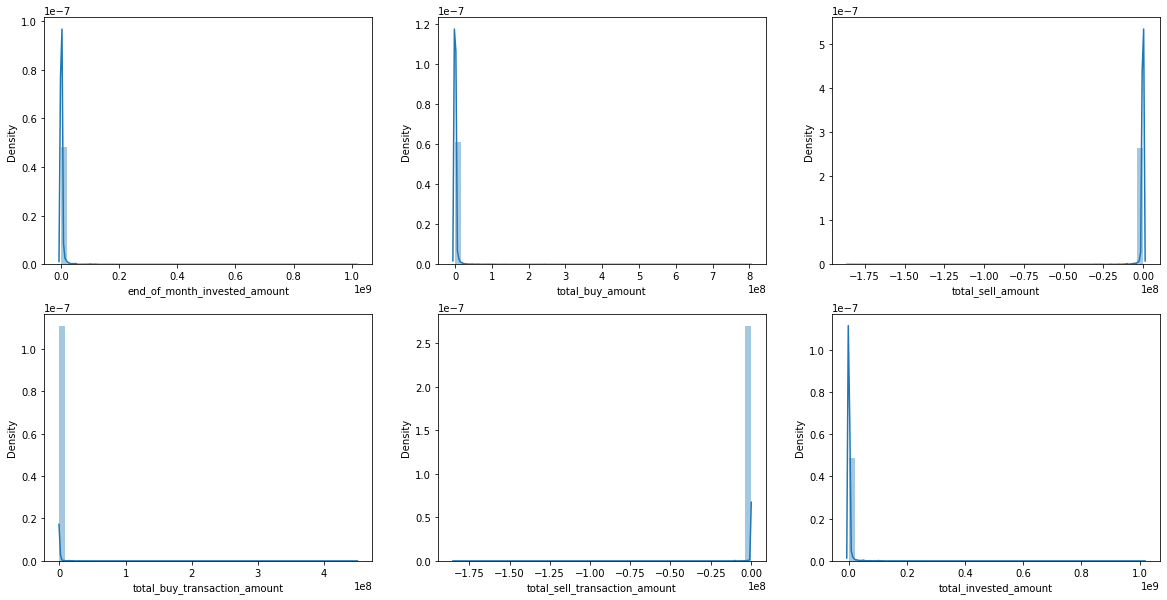

In [928]:
#Plot data distribution
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.distplot(df_o['end_of_month_invested_amount'])

plt.subplot(2,3,2)
sns.distplot(df_o['total_buy_amount'])

plt.subplot(2,3,3)
sns.distplot(df_o['total_sell_amount'])

plt.subplot(2,3,4)
sns.distplot(df_o['total_buy_transaction_amount'])

plt.subplot(2,3,5)
sns.distplot(df_o['total_sell_transaction_amount'])

plt.subplot(2,3,6)
sns.distplot(df_o['total_invested_amount'])

Insight
1. From several of the analytics above regarding of outliers and distribution data, it was found that the results were distorted due to the large number of range values and empty data
2. In this case all data is left in its original condition, because all data is important and still makes sense in this condition

# 5.Exploratory Data Analysis
What are your business questions that you can formulate and what are the answers?
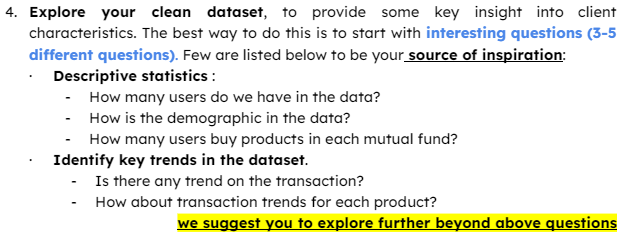

## A. Descriptive Statistics

In [929]:
df_da = df_join.copy() # copy data from cleaning

### a. How many users do we have in the data?

In [930]:
# How many users do we have in the data
print('Total registered users : ', df_ts['user_id'].nunique())
print('Total users with active transaction : ', df_da['user_id'].nunique())
print('Percentage of active users : ', df_da['user_id'].nunique()/df_ts['user_id'].nunique()*100)

Total registered users :  14712
Total users with active transaction :  8277
Percentage of active users :  56.260195758564436


Insight
1. Total registered users :  14712
2. Total users with active transaction :  8277
3. Total active users only 56.26%

In [931]:
# create the visualization
inactive = df_ts['user_id'].nunique() - int(df_da['user_id'].nunique())
active = df_da['user_id'].nunique()
df_viz = pd.DataFrame({
        'x': ['Inactive Users', 'Active Users'], 
        'y': [inactive, active]
    })
 
fig = px.pie(df_viz, values='y', names='x', title="User Distribution")
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

### b. How is the demographic in the data?

In [932]:
# Check all string data as all registered users from table users
df_cc = df_ts.copy()
df_cc['user_age'] = df_cc['user_age'].astype(str)
obj_all = ['user_id','user_gender', 'user_age', 'user_occupation', 'user_income_range', 'referral_code_used','user_income_source']
df_cc[obj_all].describe()

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
count,14712,14712,14712,14712,14712,14712,14712
unique,14712,2,58,9,6,2,10
top,162882,Male,21,Pelajar,< 10 Juta,no referral,Gaji
freq,1,8977,1192,7887,6275,9108,9131


In [933]:
df_cc['user_age'].astype(int).describe()

count    14712.000000
mean        27.176591
std          8.552585
min         17.000000
25%         21.000000
50%         25.000000
75%         31.000000
max         83.000000
Name: user_age, dtype: float64

<AxesSubplot:title={'center':'User Gender'}>

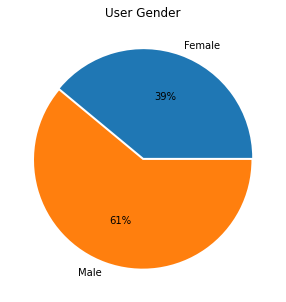

In [934]:
# Visualization the total of user_gender
dfv_ug = df_cc.groupby(['user_gender'])['user_gender'].count()

dfv_ug.plot(kind='pie', title='User Gender', ylabel='',
         xlabel='', figsize=(6, 5), autopct="%.f%%",explode = (0.01,0.01))

<AxesSubplot:title={'center':'User Age'}, xlabel='User Age', ylabel='Total Age'>

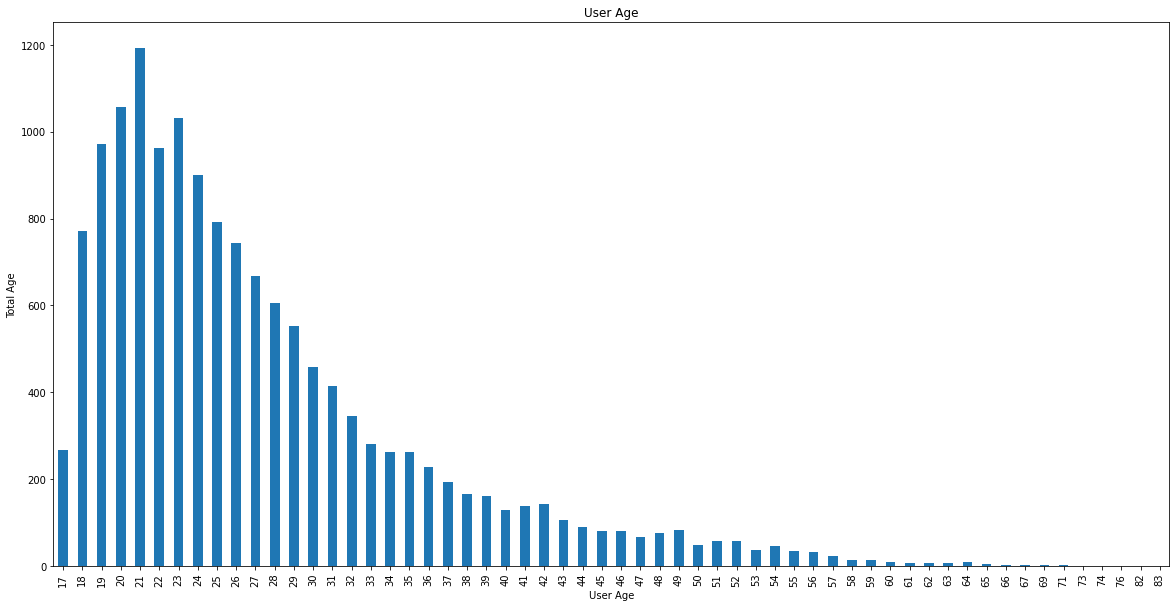

In [935]:
# Visualization the total of user_age	
dfv_ua = df_cc.groupby(['user_age'])['user_age'].count()

dfv_ua.plot(kind='bar', title='User Age', ylabel='Total Age',
         xlabel='User Age', figsize=(20, 10))

In [936]:
dfv_uap = df_cc.groupby(['user_age'])['user_id'].count()
dfv_uap = dfv_uap.reset_index()

In [937]:
dfv_uap = dfv_uap.sort_values('user_id',ascending = False)  #Sort the values for cummulative percentage

In [938]:
dfv_uap['cum_percentage'] = np.round(dfv_uap['user_id'].cumsum()/dfv_uap['user_id'].sum() * 100,2)   #add cumulative sum using .cumsum()
dfv_uap

,user_age,user_id,cum_percentage
4,21,1192,8.10
3,20,1058,15.29
6,23,1031,22.30
2,19,972,28.91
5,22,963,35.45
7,24,901,41.58
8,25,792,46.96
1,18,771,52.20
9,26,744,57.26
10,27,668,61.80


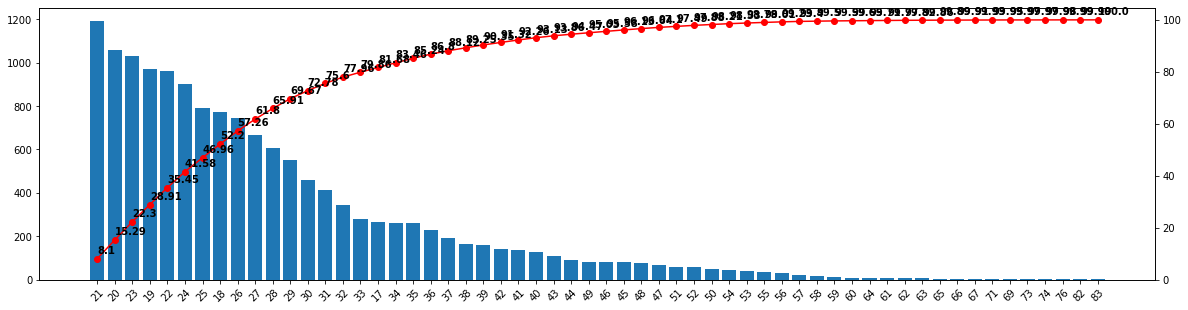

In [939]:
fig,ax = plt.subplots(figsize=(20, 5))    #To create sub plot

x = dfv_uap['user_age']
y_bar = dfv_uap['user_id']
y_line = dfv_uap['cum_percentage']

ax.bar(x,y_bar)   #To create the bar chart

plt.xticks(rotation = 45) 

ax2 = ax.twinx()     #To create combo chart, create twin axis of y, by sharing x axis
ax2.plot(x,y_line, marker = 'o', color = 'red')   #To create the line chart
ax2.set_ylim(ymin=0)    #To make the line chart start at 0

#To create the data labels
for i, v in enumerate(y_line):                                   
    vmil = round(v,2)
    plt.text(i, v+2, str(vmil), fontweight='bold')

plt.show()

<AxesSubplot:title={'center':'User income range'}, xlabel='User income range', ylabel='Total income range'>

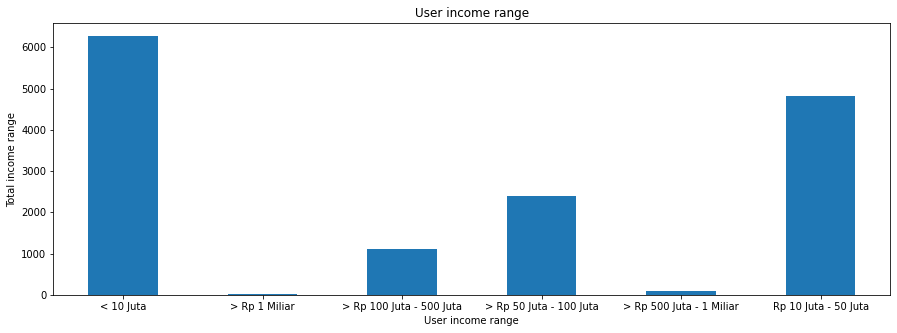

In [940]:
# Visualization the total of user_income_range	
dfv_ui = df_cc.groupby(['user_income_range'])['user_income_range'].count()
dfv_ui.plot(kind='bar', title='User income range', ylabel='Total income range',
         xlabel='User income range', figsize=(15, 5), rot=0)

<AxesSubplot:title={'center':'User occupation'}, xlabel='User occupation', ylabel='Total occupation'>

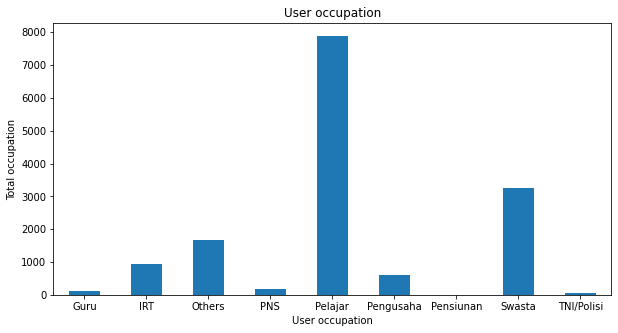

In [941]:
# Visualization the total of user_occupation	
dfv_uo = df_cc.groupby(['user_occupation'])['user_occupation'].count()

dfv_uo.plot(kind='bar', title='User occupation', ylabel='Total occupation',
         xlabel='User occupation', figsize=(10, 5), rot=0)

In [942]:
dfv_uop = df_cc.copy()
dfv_uop = dfv_uop[dfv_uop['user_occupation'] =='Pelajar']
dfv_uop['user_income_source'].value_counts()

Gaji                     4483
Dari Orang Tua / Anak     944
Undian                    923
Keuntungan Bisnis         855
Tabungan                  307
Lainnya                   200
Hasil Investasi           102
Dari Suami / istri         37
Warisan                    23
Bunga Simpanan             13
Name: user_income_source, dtype: int64

<AxesSubplot:title={'center':'User income source'}, xlabel='User income source', ylabel='Total income source'>

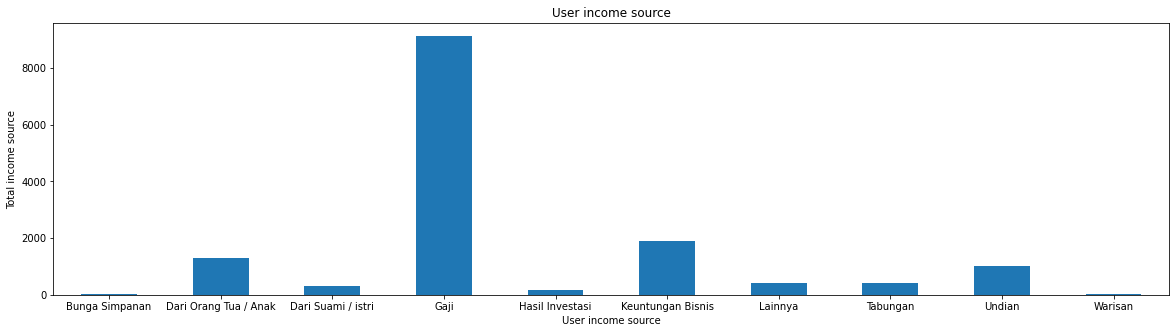

In [943]:
# Visualization the total of user_income_source	
dfv_uis = df_cc.groupby(['user_income_source'])['user_income_source'].count()

dfv_uis.plot(kind='bar', title='User income source', ylabel='Total income source',
         xlabel='User income source', figsize=(20, 5),rot=0)

In [944]:
# Visualization of summary total demographic data
df_viz_demo = pd.DataFrame({
        'Demographic': ['Gender:Male', 'Age:21', 'Occupation:Pelajar', 'Income:<10 Juta', 'income:Gaji'], 
        'Frequency': [8977, 1192,7887,6275,9131]
    })
 
fig = px.bar(df_viz_demo, y='Frequency', x='Demographic', title="High Frequency of Demographic Data")
fig.show()

Insight
1. The typical demographic data from active and inactive data is same, so we can use the total data
2. The most user gender that use application to buy and sell mutual funds is Male with frequency 8977 from total user 14712
3. The most user age that use application to buy and sell mutual funds is 21 with frequency 1192 from total user 14712
4. The most user occupation that use application to buy and sell mutual funds is Pelajar with frequency 7887 from total user 14712
5. The most user income that use application to buy and sell mutual funds is <10 Juta with frequency 6275 from total user 14712
6. The most user income user that use application to buy and sell mutual funds is from Gaji with frequency 9131 from total user 14712

### c. How many users buy products in each mutual fund?

In [945]:
#Copy the dataframe to select the columns that will be used for this case
df_dd = df_da.copy()
df_dd = df_dd.drop(columns=['registration_import_datetime', 'user_gender', 'user_age', 'user_occupation', 'user_income_range', 'referral_code_used','user_income_source', 'end_of_month_invested_amount','total_buy_amount', 'total_sell_amount', 'date','sell_saham_transaction_amount','sell_pasar_uang_transaction_amount','sell_pendapatan_tetap_transaction_amount','sell_campuran_transaction_amount','total_sell_transaction_amount','saham_invested_amount', 'pasar_uang_invested_amount','pendapatan_tetap_invested_amount', 'campuran_invested_amount','total_invested_amount'])

In [946]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 6 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   user_id                                  158811 non-null  object 
 1   buy_saham_transaction_amount             99031 non-null   float64
 2   buy_pasar_uang_transaction_amount        122263 non-null  float64
 3   buy_pendapatan_tetap_transaction_amount  98916 non-null   float64
 4   buy_campuran_transaction_amount          5072 non-null    float64
 5   total_buy_transaction_amount             158811 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 8.5+ MB


In [947]:
saham = df_dd[df_dd['buy_saham_transaction_amount']>0]
saham.nunique()

user_id                                    1938
buy_saham_transaction_amount                421
buy_pasar_uang_transaction_amount           204
buy_pendapatan_tetap_transaction_amount     310
buy_campuran_transaction_amount              13
total_buy_transaction_amount                479
dtype: int64

In [948]:
saham.shape

(3471, 6)

In [949]:
pu = df_dd[df_dd['buy_pasar_uang_transaction_amount']>0]
pu.nunique()

user_id                                    2359
buy_saham_transaction_amount                256
buy_pasar_uang_transaction_amount           407
buy_pendapatan_tetap_transaction_amount     285
buy_campuran_transaction_amount              12
total_buy_transaction_amount                506
dtype: int64

In [950]:
pu.shape

(4426, 6)

In [951]:
pt = df_dd[df_dd['buy_pendapatan_tetap_transaction_amount']>0]
pt.nunique()

user_id                                    2240
buy_saham_transaction_amount                275
buy_pasar_uang_transaction_amount           212
buy_pendapatan_tetap_transaction_amount     501
buy_campuran_transaction_amount              14
total_buy_transaction_amount                521
dtype: int64

In [952]:
pt.shape

(4086, 6)

In [953]:
ct = df_dd[df_dd['buy_campuran_transaction_amount']>0]
ct.nunique()

user_id                                    78
buy_saham_transaction_amount               20
buy_pasar_uang_transaction_amount          18
buy_pendapatan_tetap_transaction_amount    22
buy_campuran_transaction_amount            32
total_buy_transaction_amount               47
dtype: int64

In [954]:
ct.shape

(131, 6)

<AxesSubplot:title={'center':'Total user buy products in each mutual fund'}, xlabel='Total Users Buy Saham -- Total Users Buy Pasar uang -- Total User Buy Pendapatan Tetap -- Total User Buy Campuran', ylabel='Total Transaction'>

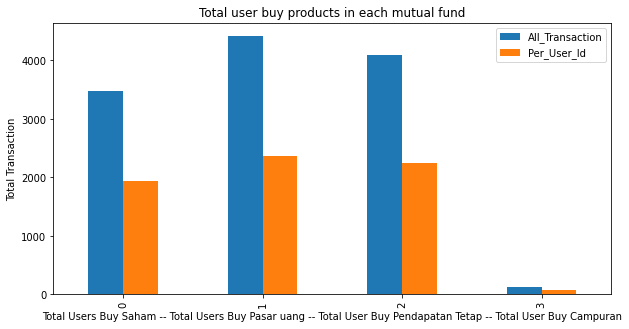

In [955]:
# Visualization of the total user buy products in each mutual fund
value1 = [3471, 4426, 4086, 131] 
value2 = [1938, 2359, 2240, 78]
results1 = DataFrame({'All_Transaction': value1, 'Per_User_Id': value2})	
results1.plot(kind='bar', title='Total user buy products in each mutual fund', ylabel='Total Transaction',
         xlabel='Total Users Buy Saham -- Total Users Buy Pasar uang -- Total User Buy Pendapatan Tetap -- Total User Buy Campuran', 
         figsize=(10, 5))

Insight
1. Total transaction of buy_saham_transaction_amount is 3471 from 1938 user_id
2. Total transaction of buy_pasar_uang_transaction_amount is 4426 from 2359 user_id
3. Total transaction of buy_pendapatan_tetap_transaction_amount is 4086 from 2240 user_id
4. Total transaction of buy_campuran_transaction_amount is 131 from 78 user_id

## B. Identify Key Trends in The Dataset

In [956]:
df_db = df_join.copy()
df_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

### a. Is there any trend on the transaction?

In [957]:
df_db['date'].describe()

<ipython-input-957-ddd6218aa07d>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  158811
unique                     42
top       2021-09-30 00:00:00
freq                     8277
first     2021-08-04 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

#### Total buy transaction

In [958]:
trans_trend = df_db[['date','total_buy_transaction_amount']]    #Choose the variable wee need to make the chart
trans_trend['year_month'] = trans_trend['date'].dt.strftime('%Y/%m/%d')   #Change the issue month into year,month format to get monthly data

trans_trend = trans_trend.sort_values('date')  #Sort the values by the issue month, ascending
trans_trend = trans_trend.groupby('year_month').sum() #sum the data and group it by the year_month
trans_trend = trans_trend.reset_index()
trans_trend.head()

<ipython-input-958-78f8ccd92531>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year_month,total_buy_transaction_amount
0,2021/08/04,0
1,2021/08/05,14570000
2,2021/08/06,20880000
3,2021/08/09,40975000
4,2021/08/10,24922709


In [959]:
trans_trend.describe()

,total_buy_transaction_amount
count,4.200000e+01
mean,2.952040e+08
std,2.239834e+08
min,0.000000e+00
25%,1.774754e+08
50%,2.633498e+08
75%,4.026311e+08
max,8.275414e+08


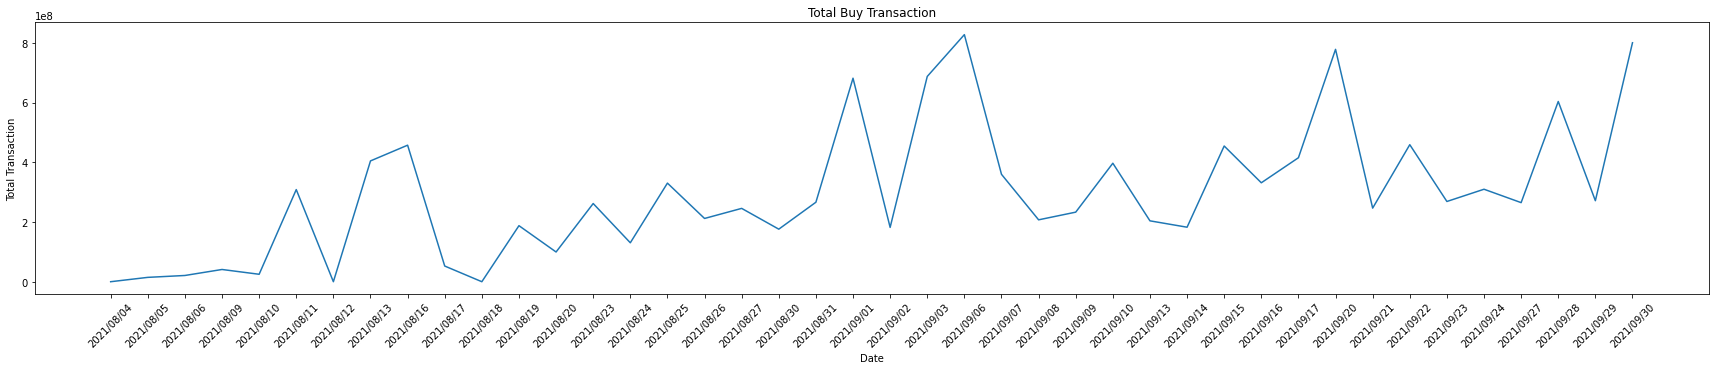

In [960]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 45)
plt.title('Total Buy Transaction')
plt.plot(trans_trend['year_month'], trans_trend['total_buy_transaction_amount'])
plt.xlabel('Date')
plt.ylabel('Total Transaction')

plt.show()

Insight
1. The total trend of buying mutual funds from the period August 04, 2021 to September 30, 2021 experienced ups and downs with the final total transactions increasing rapidly
2. The maximum total buy transaction is 827.5414M
3. The mean of total buy transaction is 295.2040M

#### Total user buy transaction

In [961]:
user_trend = df_db[['date','user_id']]    #Choose the variable wee need to make the chart
user_trend['year_month'] = user_trend['date'].dt.strftime('%Y/%m/%d')   #Change the issue month into year,month format to get monthly data

user_trend = user_trend.sort_values('date')  #Sort the values by the issue month, ascending
user_trend = user_trend.groupby('year_month')['user_id'].count() #sum the data and group it by the year_month
user_trend = user_trend.reset_index()
user_trend.tail()

<ipython-input-961-f72eca480eca>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year_month,user_id
37,2021/09/24,7257
38,2021/09/27,7416
39,2021/09/28,7593
40,2021/09/29,8007
41,2021/09/30,8277


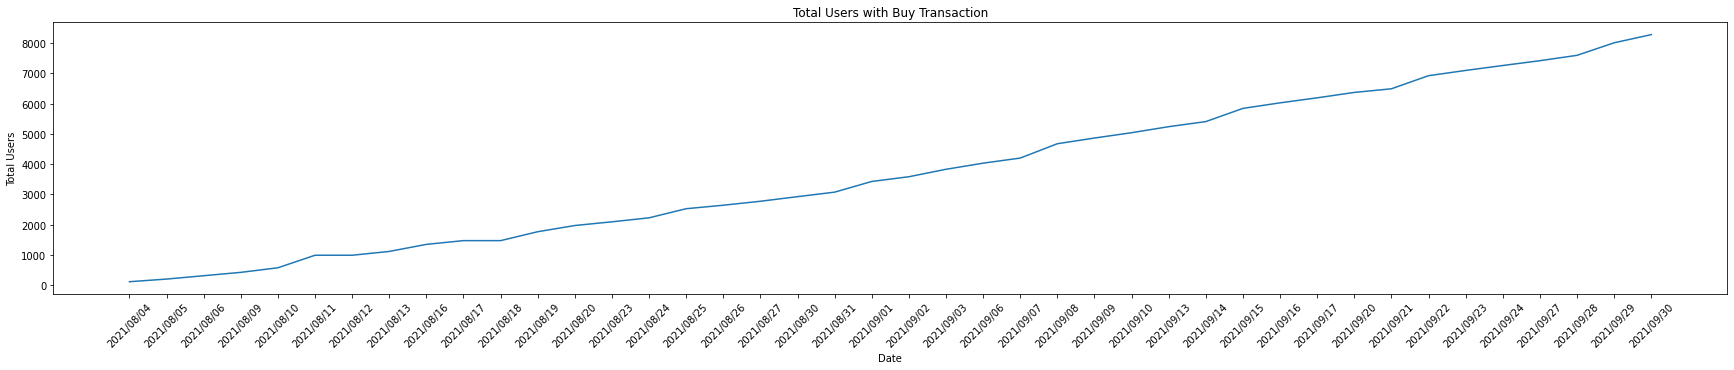

In [962]:
plt.figure(figsize =(30, 5))
plt.xticks(rotation = 45)
plt.plot(user_trend['year_month'], user_trend['user_id'])
plt.title('Total Users with Buy Transaction')
plt.xlabel('Date')
plt.ylabel('Total Users')
plt.show()

Insight
1. Total users who make transactions continue to increase during the existing period
2. Even though there has been an increase and decrease in total purchase transactions, the number of users making transactions continues to increase

### b. How about transaction trends for each product?

In [963]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [964]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 6 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   user_id                                  158811 non-null  object 
 1   buy_saham_transaction_amount             99031 non-null   float64
 2   buy_pasar_uang_transaction_amount        122263 non-null  float64
 3   buy_pendapatan_tetap_transaction_amount  98916 non-null   float64
 4   buy_campuran_transaction_amount          5072 non-null    float64
 5   total_buy_transaction_amount             158811 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 8.5+ MB


In [965]:
# Create variable of dataframe groupby with sum
date_all = df_db['date']
sum1 = df_db.groupby('date')['buy_saham_transaction_amount'].sum()
sum2 = df_db.groupby('date')['buy_pasar_uang_transaction_amount'].sum()
sum3 = df_db.groupby('date')['buy_pendapatan_tetap_transaction_amount'].sum()
sum4 = df_db.groupby('date')['buy_campuran_transaction_amount'].sum()

In [966]:
#Convert variable to dataframe
df_sum1 = pd.DataFrame(sum1, columns=['buy_saham_transaction_amount'])
df_sum2 = pd.DataFrame(sum2, columns=['buy_pasar_uang_transaction_amount'])
df_sum3 = pd.DataFrame(sum3, columns=['buy_pendapatan_tetap_transaction_amount'])
df_sum4 = pd.DataFrame(sum4, columns=['buy_campuran_transaction_amount'])

In [967]:
#Join the table on dataframe by outerjoin
df_sum_12 = df_sum1.merge(df_sum2, how='outer', left_on =['date'], right_on = ['date'])
df_sum_123 = df_sum_12.merge(df_sum3, how='outer', left_on =['date'], right_on = ['date'])
df_sum_1234 = df_sum_123.merge(df_sum4, how='outer', left_on =['date'], right_on = ['date'])
df_sum_1234.head()

,buy_saham_transaction_amount,buy_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount
date,,,,
2021-08-04,0.0,0.0,0.0,0.0
2021-08-05,1430000.0,2730000.0,10410000.0,0.0
2021-08-06,4010000.0,1555000.0,6315000.0,9000000.0
2021-08-09,4130000.0,6030000.0,5315000.0,25500000.0
2021-08-10,5779994.0,14022715.0,5020000.0,100000.0


In [968]:
#Describe the data transaction trends
df_sum_1234.describe()

,buy_saham_transaction_amount,buy_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount
count,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01
mean,3.786540e+07,8.870569e+07,1.559799e+08,1.265302e+07
std,3.236185e+07,9.359594e+07,1.511020e+08,1.298025e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.604521e+07,3.173229e+07,3.445300e+07,3.292750e+06
50%,2.664805e+07,6.609161e+07,1.168879e+08,9.075000e+06
75%,5.331122e+07,9.700440e+07,2.311538e+08,1.865125e+07
max,1.355793e+08,4.479010e+08,5.764888e+08,5.800000e+07


In [969]:
#Create the visualization
fig = px.bar(df_sum_1234, y=df_sum_1234.columns[0:],title='Transaction Trends for Each Product',width=1500) 
fig.update_layout(legend=dict(yanchor="top",y=0.99, xanchor="left",x=0.01))
fig.show()

Insight
1. The highest total transactions were on Pendapatan Tetap followed by Pasar Uang, Saham and campuran
2. The highest transaction on pendapatan tetap is 576.4888M with mean values is 155.9799M
3. The highest transaction on pasar uang is 447.9010M with mean values is 88.70569M
4. The highest transaction on saham is 135.5793M	with mean values is 37.86540M
5. The highest transaction on campuran is 58.000M	with mean values is 12.65302M
6. All buy transactions for each product experienced increases and decreases, but relatively increased at the end of the period except mixed transactions
7. the increase and decrease in the number of transactions is very high in pendapatan tetap products

#6.Cluster Analysis

## A. Data Preparation

In [970]:
#Import libraries
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs

In [971]:
# Copy the dataset from join dataset
dfcd = df_join.copy()

In [972]:
dfcd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [973]:
# Create new column Frequency from count of transaction date
df_freq = dfcd.groupby('user_id')['date'].count()
df_freq = df_freq.reset_index()
df_freq.columns = ['user_id', 'frequency']
df_freq

,user_id,frequency
0,1004326,31
1,1005053,2
2,1005165,21
3,1018814,23
4,1023627,34
...,...,...
8272,988940,12
8273,989618,30
8274,990466,24
8275,99245,11


In [974]:
# Merge dataset frequency to users
dfm = df_freq.merge(df_ts, on='user_id', how='inner')
dfm = dfm.reset_index()

In [975]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   index                         8277 non-null   int64         
 1   user_id                       8277 non-null   object        
 2   frequency                     8277 non-null   int64         
 3   registration_import_datetime  8277 non-null   datetime64[ns]
 4   user_gender                   8277 non-null   object        
 5   user_age                      8277 non-null   int64         
 6   user_occupation               8277 non-null   object        
 7   user_income_range             8277 non-null   object        
 8   referral_code_used            8277 non-null   object        
 9   user_income_source            8277 non-null   object        
 10  end_of_month_invested_amount  8277 non-null   int64         
 11  total_buy_amount              

Insight
1. Total rows of dataset decrease from 14712 to 8277 after merge due to only active users from periode 2 month that merge

In [976]:
# confirm no duplicates on user_id
dfm.nunique()

index                           8277
user_id                         8277
frequency                         40
registration_import_datetime    6581
user_gender                        2
user_age                          56
user_occupation                    9
user_income_range                  6
referral_code_used                 2
user_income_source                10
end_of_month_invested_amount    1042
total_buy_amount                 824
total_sell_amount                548
dtype: int64

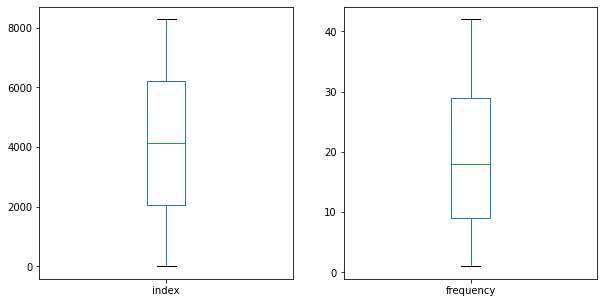

In [977]:
# Check distribution data by boxplot
# filter numeric column
feature = ['index', 'frequency']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = dfm.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [978]:
# Create variable of dataset frequency
df_sf = dfm[['user_id','index', 'frequency']]
df_sf

,user_id,index,frequency
0,1004326,0,31
1,1005053,1,2
2,1005165,2,21
3,1018814,3,23
4,1023627,4,34
...,...,...,...
8272,988940,8272,12
8273,989618,8273,30
8274,990466,8274,24
8275,99245,8275,11


<AxesSubplot:xlabel='index', ylabel='frequency'>

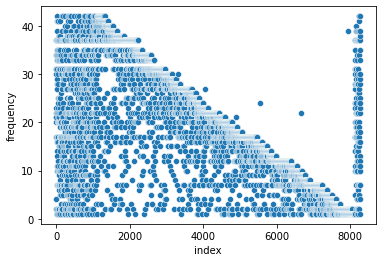

In [979]:
#Create scatter plot between index as user_id and frequency
sns.scatterplot(data = df_sf, x='index', y='frequency')

In [980]:
# Define Standard Scale dataset
ss_scale_df = df_sf.copy()
column = ['index','frequency']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<AxesSubplot:xlabel='index', ylabel='frequency'>

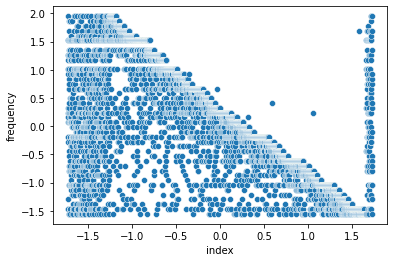

In [981]:
#Create scatter plot between index as user_id and frequency after scale
sns.scatterplot (data = ss_scale_df, x='index', y='frequency')

## B. K-Means Clustering

### a. Elbow Method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

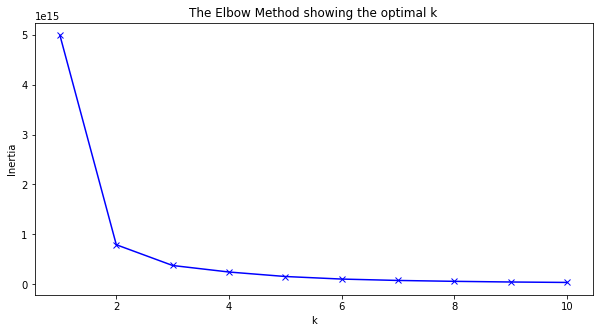

[4987185575122933.0, 793572714663277.8, 377690563286352.06, 247076469743994.3, 157240403908919.66, 105832395274862.95, 78219906136245.06, 60516172089543.01, 47164280678785.39, 38278140518701.56]


In [982]:
# K-Means Clustering by elbow method
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### b. Silhouette Method

In [983]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(12, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_score is : 0.5344165733550114


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3 The average silhouette_score is : 0.46421510976916225


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_score is : 0.5210779680425659


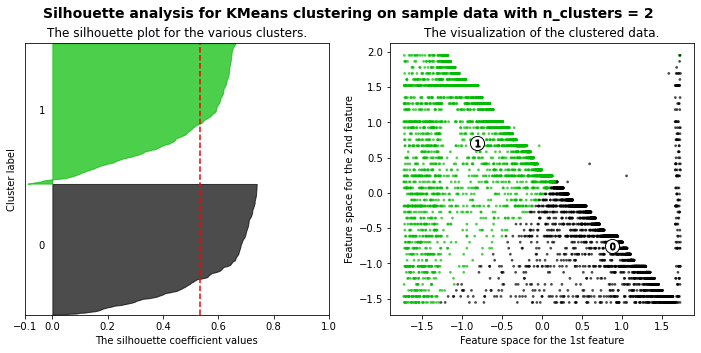

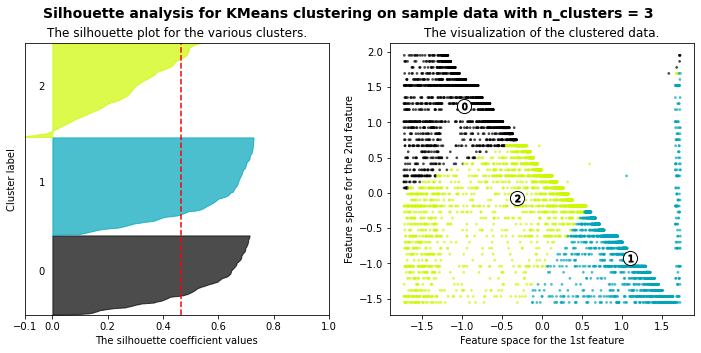

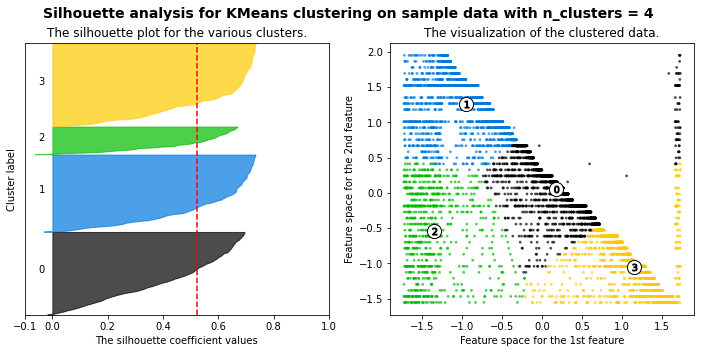

In [984]:
# Create silhoutte analysis of cluster 2-4 based on elbow method
silhoutte_analysis(ss_scale_df[['index', 'frequency']],list(range(2,5))) 

## C. Segmentation

In [985]:
# make 2 cluster to check the data by boxplot
Cluster_2 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=2)
cluster_model.fit_predict(Cluster_2[['index', 'frequency']])
Cluster_2['cluster'] = cluster_model.labels_
Cluster_2.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,user_id,index,frequency,cluster
0,1004326,-1.731842,1.009780,1
1,1005053,-1.731423,-1.469157,1
2,1005165,-1.731005,0.154974,1
3,1018814,-1.730586,0.325935,1
4,1023627,-1.730167,1.266222,1


<AxesSubplot:xlabel='cluster', ylabel='index'>

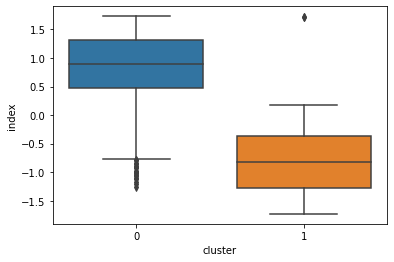

In [986]:
# comparation data between cluster and index as user id 
sns.boxplot (data =Cluster_2 , x ='cluster' , y ='index')

<AxesSubplot:xlabel='cluster', ylabel='frequency'>

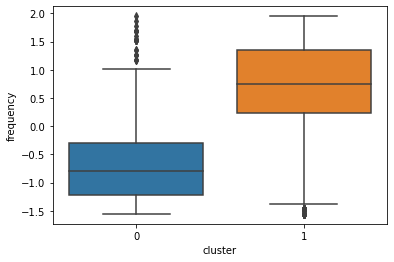

In [987]:
# comparation data between cluster and frequency
sns.boxplot (data =Cluster_2 , x ='cluster' , y ='frequency')

In [988]:
# make 3 cluster to check the data by boxplot
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)
cluster_model.fit_predict(Cluster_3[['index', 'frequency']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,user_id,index,frequency,cluster
0,1004326,-1.731842,1.009780,0
1,1005053,-1.731423,-1.469157,1
2,1005165,-1.731005,0.154974,0
3,1018814,-1.730586,0.325935,0
4,1023627,-1.730167,1.266222,0


<AxesSubplot:xlabel='cluster', ylabel='index'>

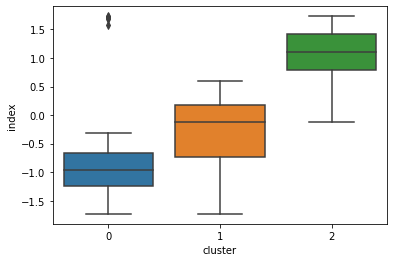

In [989]:
#  comparation data between cluster and index as user id
sns.boxplot (data = Cluster_3 , x ='cluster' , y ='index')

<AxesSubplot:xlabel='cluster', ylabel='frequency'>

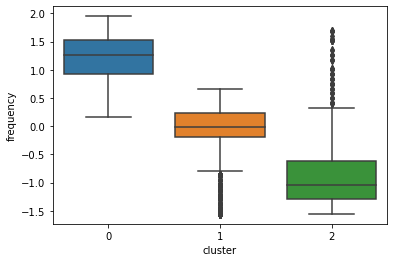

In [990]:
# comparation data between cluster and frequency
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='frequency')

In [991]:
# merge the dataset from cluster 3 to user for next analysis by cluster
df_segmented = Cluster_3.merge(dfm,how= 'inner', on = 'user_id')
df_segmented

,user_id,index_x,frequency_x,cluster,index_y,frequency_y,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,1004326,-1.731842,1.009780,0,0,31,2021-08-13 14:56:59,Female,30,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,200000,0,0
1,1005053,-1.731423,-1.469157,1,1,2,2021-09-20 11:37:30,Male,31,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,200000,0,0
2,1005165,-1.731005,0.154974,0,2,21,2021-08-24 17:22:37,Female,22,Pelajar,< 10 Juta,no referral,Undian,100000,0,0
3,1018814,-1.730586,0.325935,0,3,23,2021-08-25 21:06:53,Male,20,Others,< 10 Juta,no referral,Undian,0,0,-1300000
4,1023627,-1.730167,1.266222,0,4,34,2021-08-10 11:48:46,Male,33,Swasta,> Rp 100 Juta - 500 Juta,no referral,Gaji,100000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,988940,1.730167,-0.614351,2,8272,12,2021-09-01 10:27:25,Male,27,Swasta,Rp 10 Juta - 50 Juta,no referral,Gaji,500000,0,0
8273,989618,1.730586,0.924299,2,8273,30,2021-08-18 11:32:25,Male,29,Pelajar,< 10 Juta,no referral,Gaji,3000000,2000000,0
8274,990466,1.731005,0.411416,2,8274,24,2021-08-26 11:34:23,Male,33,Swasta,< 10 Juta,no referral,Gaji,2000000,1500000,0
8275,99245,1.731423,-0.699832,2,8275,11,2021-09-09 20:20:43,Male,25,Pelajar,< 10 Juta,no referral,Gaji,1000000,0,0


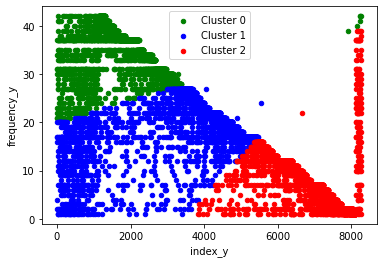

In [992]:
#Create chart of clustering
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='index_y', y='frequency_y', c='green', label='Cluster 0')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='index_y', y='frequency_y', c='blue', label='Cluster 1', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='index_y', y='frequency_y', c='red', label='Cluster 2', ax = cluster_scatter)

## D. Analysis of segmentation

In [993]:
# Check descriptive statistic of the dataset with clustering to confirm that clustering method well done
df_segmented.groupby('cluster',as_index = False)[['index_y','frequency_y']].agg(['count','mean','min','max','median']).T

cluster                       0            1            2
index_y     count   2399.000000  2875.000000  3003.000000
            mean    1826.608170  3339.728348  6748.742591
            min        0.000000     1.000000  3843.000000
            max     8266.000000  5559.000000  8276.000000
            median  1848.000000  3830.000000  6769.000000
frequency_y count   2399.000000  2875.000000  3003.000000
            mean      33.800333    18.268870     8.391941
            min       21.000000     1.000000     1.000000
            max       42.000000    27.000000    39.000000
            median    34.000000    19.000000     7.000000

In [994]:
#The number of applicants in each cluster
df_segmented.groupby(['cluster'], as_index = False)['user_id'].count()

,cluster,user_id
0,0,2399
1,1,2875
2,2,3003


In [995]:
# create the visualization
df_applicants = df_segmented.groupby(['cluster'], as_index = False)['user_id'].count()
 
fig = px.pie(df_applicants, values='user_id', names='cluster', title="Cluster User Distribution")
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

In [996]:
#Reset table
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,user_id,index_x,frequency_x,cluster,index_y,frequency_y,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,1004326,-1.731842,1.009780,0,0,31,2021-08-13 14:56:59,Female,30,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,200000,0,0
1,1005053,-1.731423,-1.469157,1,1,2,2021-09-20 11:37:30,Male,31,Swasta,> Rp 50 Juta - 100 Juta,no referral,Gaji,200000,0,0
2,1005165,-1.731005,0.154974,0,2,21,2021-08-24 17:22:37,Female,22,Pelajar,< 10 Juta,no referral,Undian,100000,0,0
3,1018814,-1.730586,0.325935,0,3,23,2021-08-25 21:06:53,Male,20,Others,< 10 Juta,no referral,Undian,0,0,-1300000
4,1023627,-1.730167,1.266222,0,4,34,2021-08-10 11:48:46,Male,33,Swasta,> Rp 100 Juta - 500 Juta,no referral,Gaji,100000,0,0


In [997]:
#Check mean of frequency on cluster
df_segmented.groupby(['cluster'], as_index = False)['frequency_y'].mean().round()

,cluster,frequency_y
0,0,34.0
1,1,18.0
2,2,8.0


In [998]:
# create the visualization
df_freq = df_segmented.groupby(['cluster'], as_index = False)['frequency_y'].mean().round()
 
fig = px.pie(df_freq, values='frequency_y', names='cluster', title="Mean Frequency Distribution")
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

Segmentation
1. Cluster 0 with the high frequency as The Confident traders
have the highest levels of confidence and control, and are the most active traders. These experienced investors are older and have the largest portfolios. 
2. Cluster 2 with the medium frequency as The Risk intolerant
group have medium levels of confidence and control. They are not active traders, but do check their investments frequently.
3. Cluster 1 with low frequency as The Conservative long term traders
have low ratings for control and confidence and, therefore, invest primarily in mutual funds and This groups trades less actively and checks their investments infrequently.

In [999]:
df_segmented.groupby(['cluster'], as_index = False)['user_age'].mean().round()

,cluster,user_age
0,0,27.0
1,1,27.0
2,2,27.0


In [1000]:
df_segmented.groupby(['cluster'], as_index = False)['end_of_month_invested_amount'].mean().round()

,cluster,end_of_month_invested_amount
0,0,3422715.0
1,1,2715172.0
2,2,1750344.0


In [1001]:
df_segmented.groupby(['cluster'], as_index = False)['total_buy_amount'].mean()

,cluster,total_buy_amount
0,0,2.472533e+06
1,1,1.443988e+06
2,2,7.710619e+05


In [1002]:
df_segmented.groupby(['cluster'], as_index = False)['total_sell_amount'].mean()

,cluster,total_sell_amount
0,0,-676645.684869
1,1,-204486.831304
2,2,-71358.686647


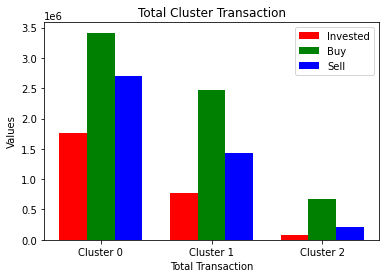

In [1003]:
# Compare the data
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [1754274, 772821, 71481]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [3415488, 2467531, 671908]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [2707617, 1435790, 204297]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Total Transaction")
plt.ylabel('Values')
plt.title("Total Cluster Transaction")
  
plt.xticks(ind+width,['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.legend( (bar1, bar2, bar3), ('Invested', 'Buy', 'Sell') )
plt.show()

In [1004]:
df_segmented.groupby(['cluster','user_occupation'], as_index = False)['user_id'].count()

,cluster,user_occupation,user_id
0,0,Guru,13
1,0,IRT,102
2,0,Others,208
3,0,PNS,46
4,0,Pelajar,1421
5,0,Pengusaha,75
6,0,Pensiunan,2
7,0,Swasta,523
8,0,TNI/Polisi,9
9,1,Guru,25


In [1005]:
df_segmented.groupby(['cluster','user_gender'], as_index = False)['user_id'].count()

,cluster,user_gender,user_id
0,0,Female,967
1,0,Male,1432
2,1,Female,1137
3,1,Male,1738
4,2,Female,997
5,2,Male,2006


In [1006]:
df_segmented.groupby(['cluster','user_income_range'], as_index = False)['user_id'].count()

,cluster,user_income_range,user_id
0,0,< 10 Juta,1068
1,0,> Rp 1 Miliar,9
2,0,> Rp 100 Juta - 500 Juta,196
3,0,> Rp 50 Juta - 100 Juta,394
4,0,> Rp 500 Juta - 1 Miliar,18
5,0,Rp 10 Juta - 50 Juta,714
6,1,< 10 Juta,1212
7,1,> Rp 1 Miliar,3
8,1,> Rp 100 Juta - 500 Juta,213
9,1,> Rp 50 Juta - 100 Juta,502


In [1007]:
df_segmented.groupby(['cluster','user_income_source'], as_index = False)['user_id'].count()

,cluster,user_income_source,user_id
0,0,Bunga Simpanan,4
1,0,Dari Orang Tua / Anak,132
2,0,Dari Suami / istri,16
3,0,Gaji,1489
4,0,Hasil Investasi,10
5,0,Keuntungan Bisnis,227
6,0,Lainnya,63
7,0,Tabungan,82
8,0,Undian,371
9,0,Warisan,5


In [1008]:
# Check transaction date
dftd = df_join.copy()
dftd = Cluster_3.merge(dftd,how= 'inner', on = 'user_id')

In [1009]:
dftd.head()

,user_id,index,frequency,cluster,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,1004326,-1.731842,1.00978,0,2021-08-13 14:56:59,Female,30,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,200000,0,0,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,90000.0,20000.0,90000.0,NaN,200000
1,1004326,-1.731842,1.00978,0,2021-08-13 14:56:59,Female,30,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,200000,0,0,2021-08-20,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,90000.0,20000.0,90000.0,NaN,200000
2,1004326,-1.731842,1.00978,0,2021-08-13 14:56:59,Female,30,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,200000,0,0,2021-08-23,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,90000.0,20000.0,90000.0,NaN,200000
3,1004326,-1.731842,1.00978,0,2021-08-13 14:56:59,Female,30,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,200000,0,0,2021-08-24,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,90000.0,20000.0,90000.0,NaN,200000
4,1004326,-1.731842,1.00978,0,2021-08-13 14:56:59,Female,30,Pelajar,> Rp 50 Juta - 100 Juta,no referral,Gaji,200000,0,0,2021-08-25,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,90000.0,20000.0,90000.0,NaN,200000


In [1010]:
dftd.groupby(['cluster','user_id'], as_index = False)['date'].count()

,cluster,user_id,date
0,0,1004326,31
1,0,1005165,21
2,0,1018814,23
3,0,1023627,34
4,0,103108,22
...,...,...,...
8272,2,988940,12
8273,2,989618,30
8274,2,990466,24
8275,2,99245,11


In [1011]:
dftd.groupby(['cluster'], as_index = False)['buy_saham_transaction_amount'].mean().round()

,cluster,buy_saham_transaction_amount
0,0,12908.0
1,1,18791.0
2,2,22553.0


In [1012]:
dftd.groupby(['cluster'], as_index = False)['buy_pasar_uang_transaction_amount'].mean().round()

,cluster,buy_pasar_uang_transaction_amount
0,0,24411.0
1,1,44322.0
2,2,21327.0


In [1013]:
dftd.groupby(['cluster'], as_index = False)['buy_pendapatan_tetap_transaction_amount'].mean().round()

,cluster,buy_pendapatan_tetap_transaction_amount
0,0,61536.0
1,1,51350.0
2,2,123620.0


In [1014]:
dftd.groupby(['cluster'], as_index = False)['buy_campuran_transaction_amount'].mean().round()

,cluster,buy_campuran_transaction_amount
0,0,103923.0
1,1,82326.0
2,2,194006.0


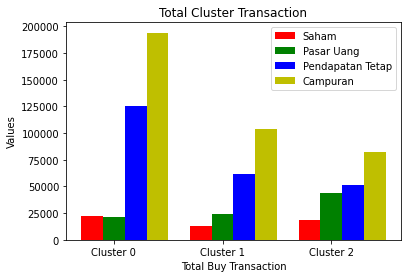

In [1015]:
N = 3
ind = np.arange(N) 
width = 0.2

xvals = [22689, 12875, 18875]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [21510, 24516, 44124]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [125276, 61566, 50946]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

zvals = [194006, 103923, 82326]
bar4 = plt.bar(ind+width*3, zvals, width, color = 'y')

plt.xlabel("Total Buy Transaction")
plt.ylabel('Values')
plt.title("Total Cluster Transaction")
  
plt.xticks(ind+width,['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.legend((bar1, bar2, bar3, bar4), ('Saham', 'Pasar Uang', 'Pendapatan Tetap', 'Campuran'),loc='upper right')
plt.show()

In [1016]:
dftd.groupby(['cluster'], as_index = False)['sell_saham_transaction_amount'].mean().round()

,cluster,sell_saham_transaction_amount
0,0,-305771.0
1,1,-219713.0
2,2,-200422.0


In [1017]:
dftd.groupby(['cluster'], as_index = False)['sell_pasar_uang_transaction_amount'].mean().round()

,cluster,sell_pasar_uang_transaction_amount
0,0,-770124.0
1,1,-403013.0
2,2,-150746.0


In [1018]:
dftd.groupby(['cluster'], as_index = False)['sell_pendapatan_tetap_transaction_amount'].mean().round()

,cluster,sell_pendapatan_tetap_transaction_amount
0,0,-781748.0
1,1,-274326.0
2,2,-220382.0


In [1019]:
dftd.groupby(['cluster'], as_index = False)['sell_campuran_transaction_amount'].mean().round()

,cluster,sell_campuran_transaction_amount
0,0,-4912972.0
1,1,-1328571.0
2,2,-1041667.0


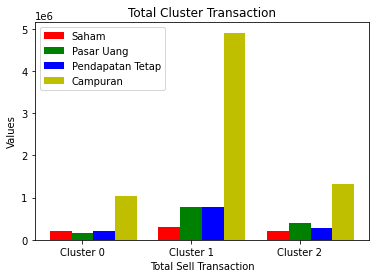

In [1020]:
N = 3
ind = np.arange(N) 
width = 0.2

xvals = [200422, 305771, 219713]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [150746, 770124, 403013]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [220382, 781748, 274326]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

zvals = [1041667, 4912972, 1328571]
bar4 = plt.bar(ind+width*3, zvals, width, color = 'y')

plt.xlabel("Total Sell Transaction")
plt.ylabel('Values')
plt.title("Total Cluster Transaction")
  
plt.xticks(ind+width,['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.legend((bar1, bar2, bar3, bar4), ('Saham', 'Pasar Uang', 'Pendapatan Tetap', 'Campuran'),loc='upper left')
plt.show()